# 5. Segmentation

## First manual segmentation was performed using ITK-Snap

## Import manually segmented image from ITK-Snap (NIFTI format)

first needed to install the library using:

conda install -c conda-forge nibabel

Using "nearly raw raster data" image format (.nrrd) in hospital projects, and this can be read in Python. 

In [33]:
import nibabel as nib
import matplotlib.pyplot as plt
im = nib.load('../../Images/PIGCT_seg.nii')
print(im)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 1)
affine: 
[[-1.  0.  0. -0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern

## When reading in the manual segmentation, the matrix is not aligned with the image. 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


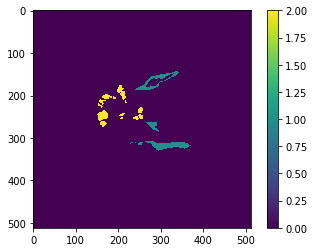

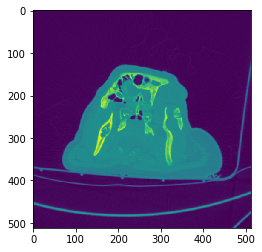

In [34]:
import imageio
data = im.get_data()
data = data[:,:,0]
print(data)

plt.imshow(data)
plt.colorbar()
plt.show()

pig = imageio.imread('../../Images/PIG_CT')
plt.imshow(pig)
plt.show()



## Transpose it to make it align.
Notice that the colormap contains integer gray-levels of 0 = background, 1 = bone, 2 = air (space between bones) (as per manual segmentation).

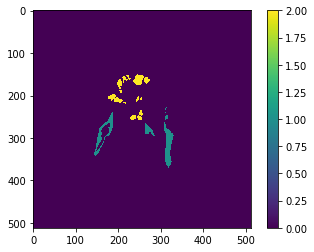

In [35]:
import numpy as np
data = np.transpose(data)
plt.imshow(data)
plt.colorbar()
plt.show()

### Mask for bone: Select only the pixels with value 1 = bone.  (see updated colormap)

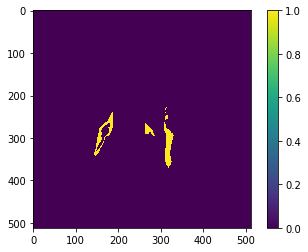

In [36]:
row,col = np.shape(data)

#  bone = np.where(condition, x, y)
#  the output array contains elements of x where condition is True, and elements from y elsewhere.
bone = np.where(data==1,1,0)

plt.imshow(bone)
plt.colorbar()
plt.show()



### Mask for air: Select only the pixels with value 2=air.  (see updated colormap)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


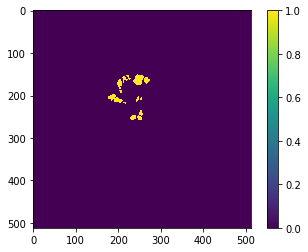

In [37]:
air = np.where(data==2,1,0)
print(air)
plt.imshow(air)
plt.colorbar()
plt.show()

## Select  pixels in image which are bone in the mask:

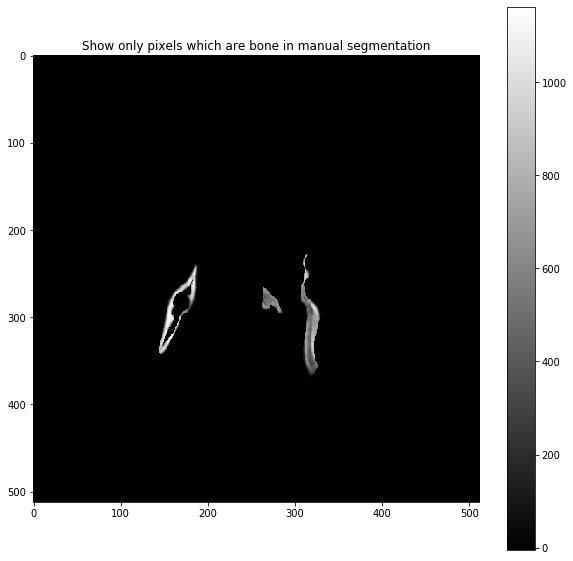

In [38]:
# Multiply bone mask with pig image
justbone = bone * pig
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,10))
pcm = ax1.imshow(justbone,cmap='gray')
ax1.set_title('Show only pixels which are bone in manual segmentation')
fig.colorbar(pcm, ax=ax1)


## Renal images - 
### Images Are More than Pictures, They Are Data.

Radiology. 2016 Feb;278(2):563-77. doi: 10.1148/radiol.2015151169. Epub 2015 Nov 18.
"Radiomics: Images Are More than Pictures, They Are Data.", Gillies et al. https://www.ncbi.nlm.nih.gov/pubmed/26579733

### Create Segmentation masks from manually segmented images

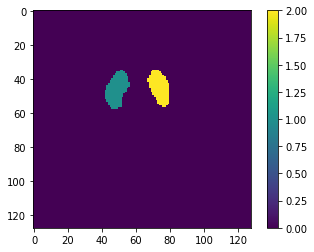

In [39]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


# Get Nifti kidney segmentation and show image.
im = nib.load('../../Images/renal/Kidney_Areas.nii')
data = im.get_data()
I = data[:,:,30]
plt.imshow(I)
plt.colorbar()
plt.show()

### Now get right and left kidneys as separate masks:

Text(0.5, 1.0, 'Right Kidney')

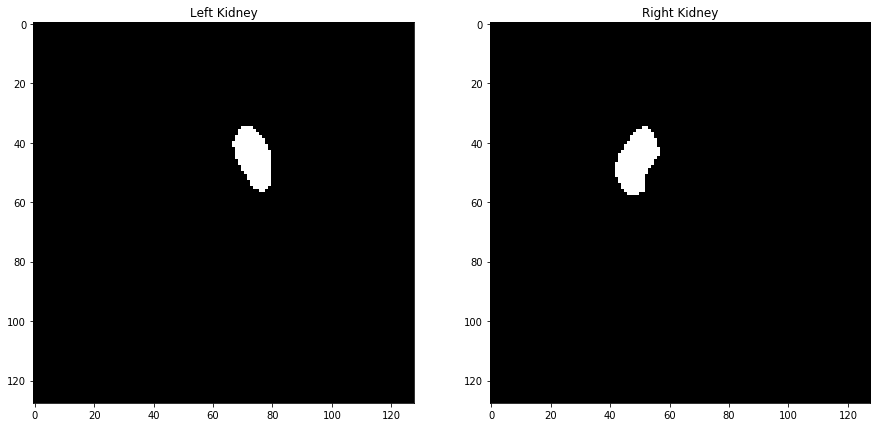

In [40]:
RightKid = np.where(I==1,1,0)
LeftKid = np.where(I==2,1,0)

fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,15))
ax1.imshow(LeftKid,cmap='gray')
ax1.set_title(f'Left Kidney')
ax2.imshow(RightKid,cmap='gray')
ax2.set_title(f'Right Kidney')


### Read in kidney images.  Discard the first 30 images.

In [41]:


Kid = nib.load('../../Images/renal/Kidneys.nii')
data = Kid.get_data()
Kim = data[:,:,30:]

# Get dimensions of kidney image sequence
row,col,slices = np.shape(Kim)
Lim = np.zeros([row,col,slices])
Rim = np.zeros([row,col,slices])


## Now apply masks to image set.

/home/jasus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


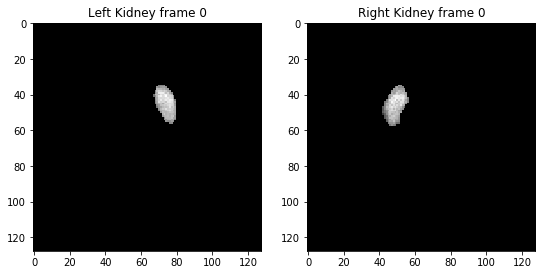

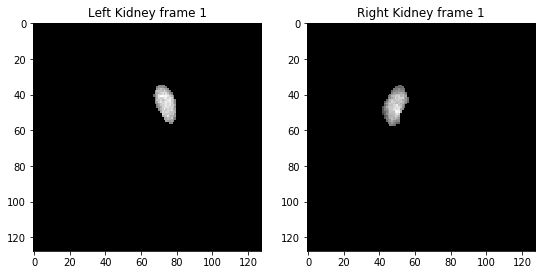

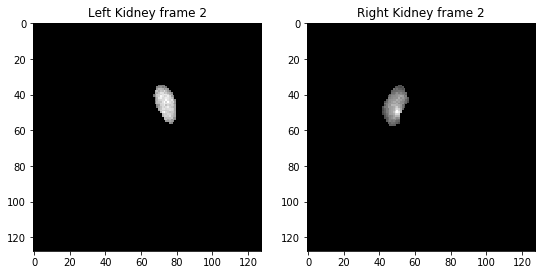

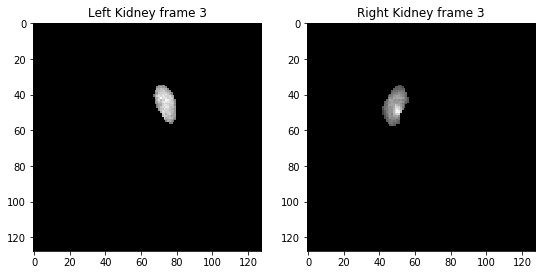

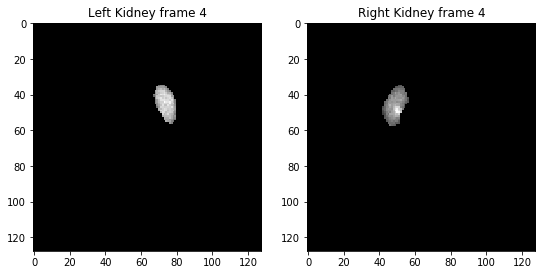

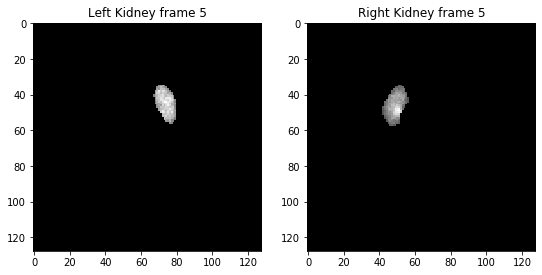

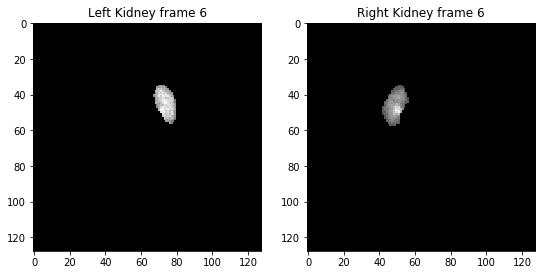

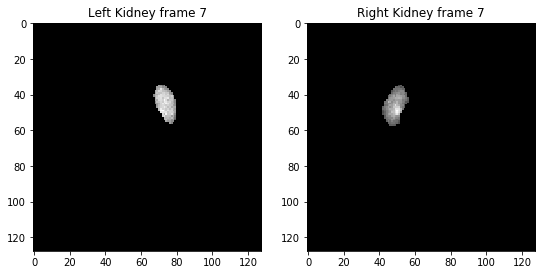

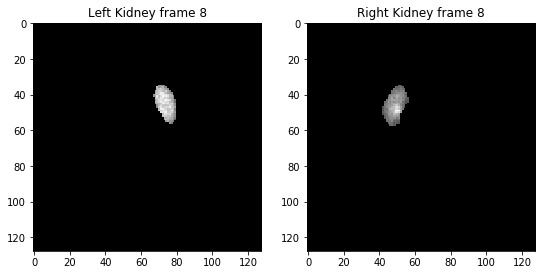

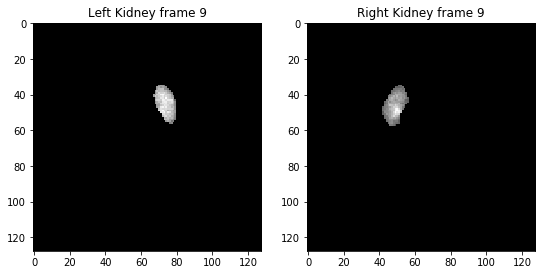

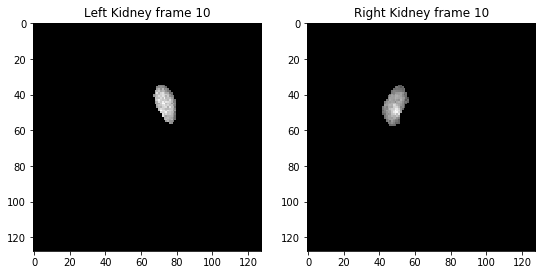

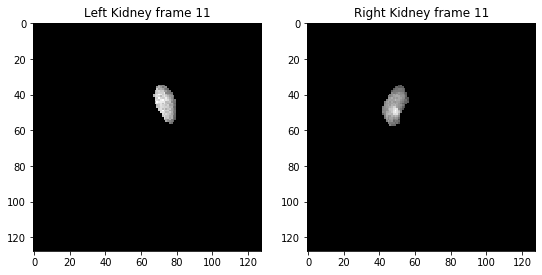

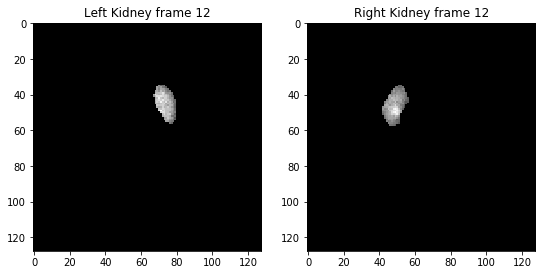

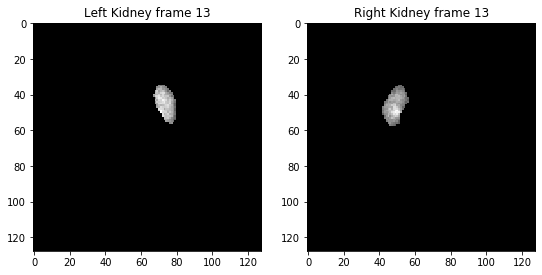

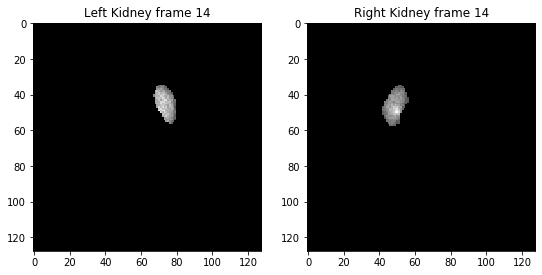

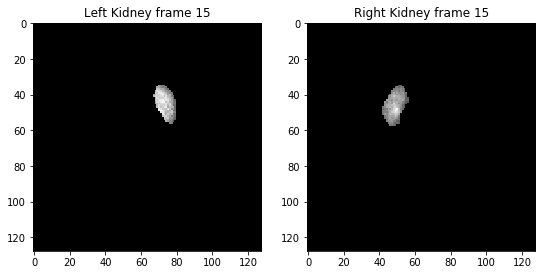

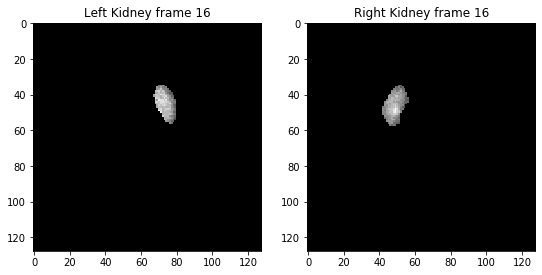

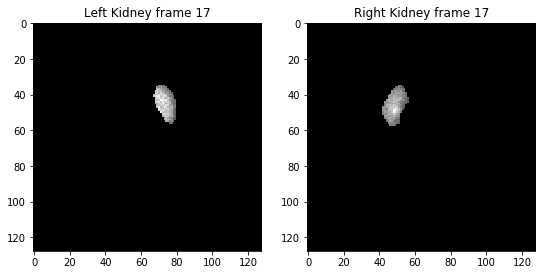

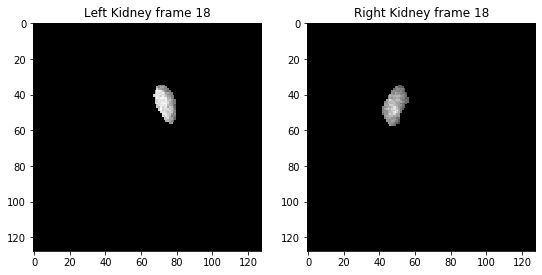

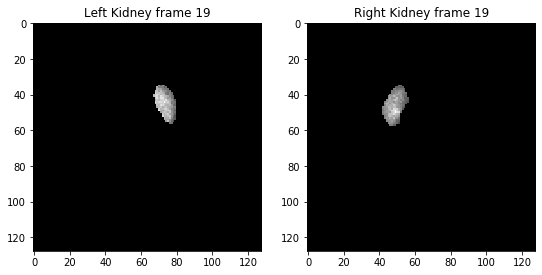

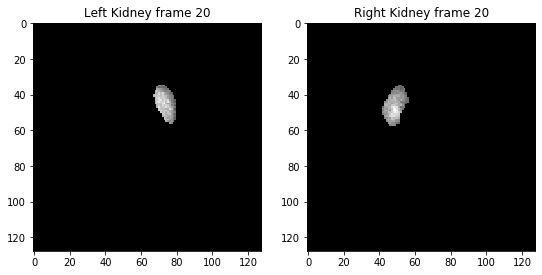

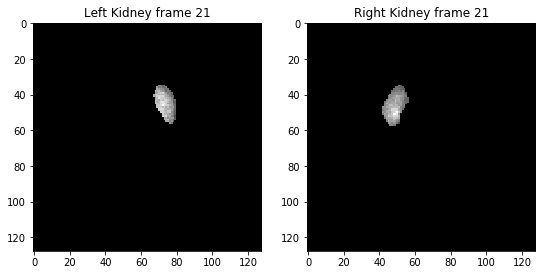

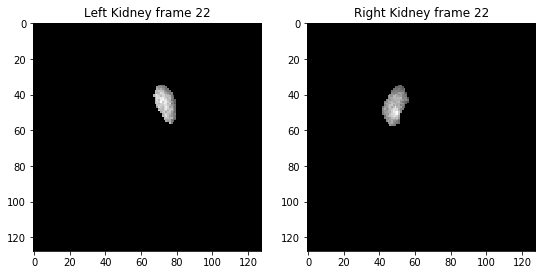

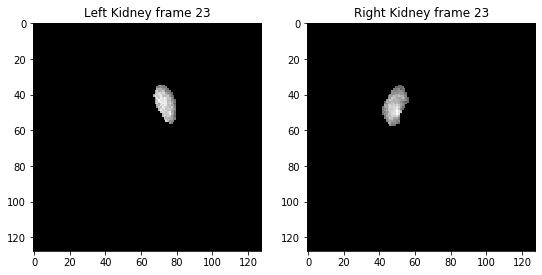

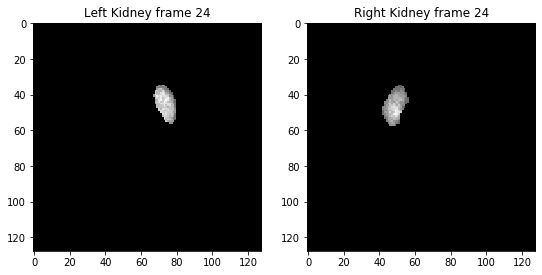

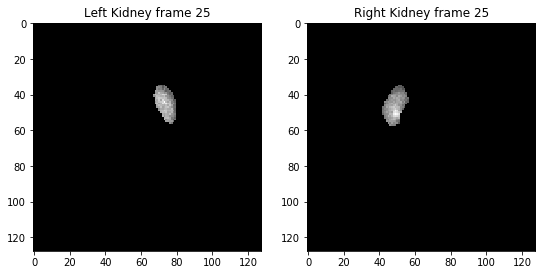

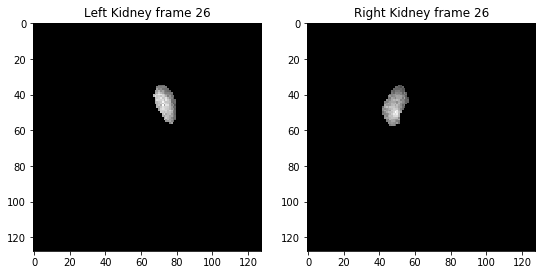

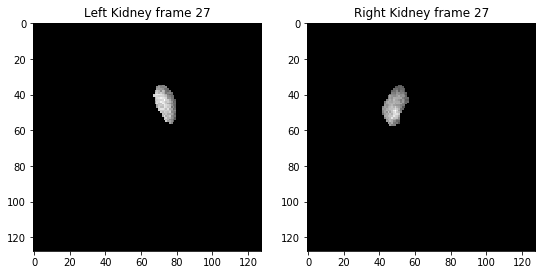

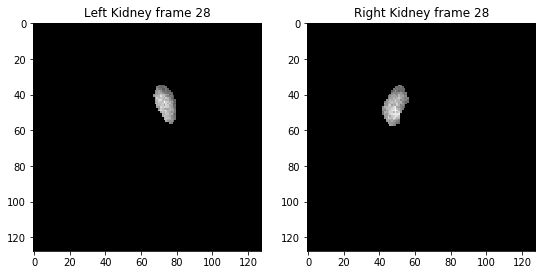

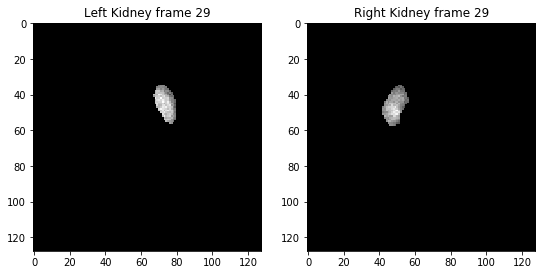

In [42]:
# Loop through all remaining slices.
for i in range(0,slices):
    Lim[:,:,i] = LeftKid * Kim[:,:,i]
    Rim[:,:,i] = RightKid * Kim[:,:,i]
    fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(9,9))
    ax1.imshow(Lim[:,:,i],cmap='gray')
    ax1.set_title(f'Left Kidney frame {i}')
    ax2.imshow(Rim[:,:,i],cmap='gray')
    ax2.set_title(f'Right Kidney frame {i}')

plt.show()


## Now sum the set of masked kidneys to get total count for each instant.

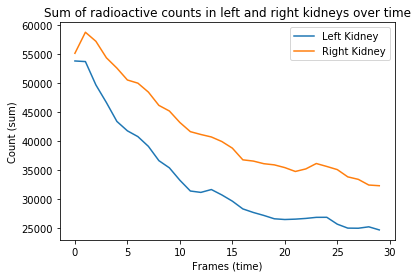

In [43]:
# Get sum of count in each kidney over the slices (producing a 1d vector)
# Sum kidney image over axis 1, then the result over 0.
Lsum=Lim.sum(axis=1)
Lsum=Lsum.sum(axis=0)

Rsum=Rim.sum(axis=1)
Rsum=Rsum.sum(axis=0)

# Plot the results (Right and left kidney sum counts on same figure)
plt.plot(Lsum, label='Left Kidney')
plt.plot(Rsum, label='Right Kidney')
plt.legend(loc="upper right")
plt.xlabel('Frames (time)')
plt.ylabel('Count (sum)')
plt.title('Sum of radioactive counts in left and right kidneys over time')
plt.show()

## Thresholding (limiarização)
### Noise added to images is Additive Gaussian noise with mean 0 and standard deviation of varying numbers of intensity levels

### Images available on Tidia

Shape of Image 1 is (651, 814)
Max and min  pixel intensity of Image 1 is 178, 76
Max and min  pixel intensity of Image 2 is 226, 23
Max and min  pixel intensity of Image 3 is 255, 0


Text(0.5, 1.0, 'mean=0, std=50 intensity levels')

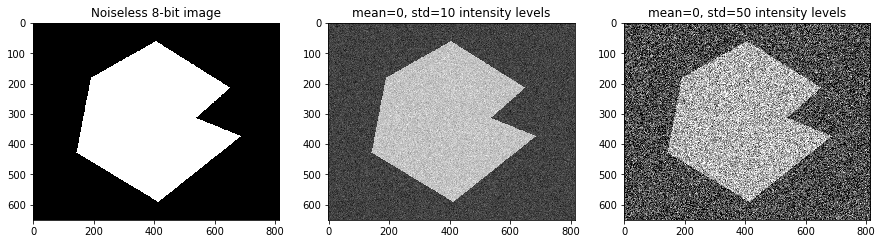

In [45]:
# Mostre histogramas de imagens com e sem ruido.

I1=imageio.imread('../../Images/SegmentOrig.tif')
I2=imageio.imread('../../Images/Segment_mean0_std10.tif')
I3=imageio.imread('../../Images/Segment_mean0_std50.tif')

print(f'Shape of Image 1 is {np.shape(I1)}')

print(f'Max and min  pixel intensity of Image 1 is {I1.max()}, {I1.min()}')
print(f'Max and min  pixel intensity of Image 2 is {I2.max()}, {I2.min()}')
print(f'Max and min  pixel intensity of Image 3 is {I3.max()}, {I3.min()}')

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(I1,cmap='gray')
ax1.set_title('Noiseless 8-bit image')
ax2.imshow(I2,cmap='gray')
ax2.set_title('mean=0, std=10 intensity levels')
ax3.imshow(I3,cmap='gray')
ax3.set_title('mean=0, std=50 intensity levels')


Text(0.5, 1.0, 'hist: mean=0, std=50 intensity levels')

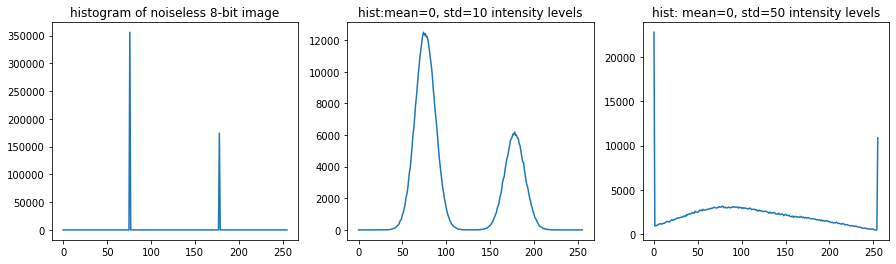

In [46]:
import cv2

#  cv2.calcHist([Image], channels, mask, histSize, ranges[, hist[, accumulate]])
#  Our image is grayscale.  There is only one channel = 0.
#  mask - we are not masking the image to produce the histogram. 
#      To calculate histogram of particular region of image, 
#          you have to create a mask image for that and give it as mask
#  histSize - We want 256 bins in the histogram
#  range = [0,256]

hist1 = cv2.calcHist([I1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([I2],[0],None,[256],[0,256])
hist3 = cv2.calcHist([I3],[0],None,[256],[0,256])

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(15,4))
ax1.plot(hist1)
ax1.set_title('histogram of noiseless 8-bit image')
ax2.plot(hist2)
ax2.set_title('hist:mean=0, std=10 intensity levels')
ax3.plot(hist3)
ax3.set_title('hist: mean=0, std=50 intensity levels')



### It seems that the pixel values of Im3 were clipped to 0 and 255 when they went outside this range, 
### resulting in a large number of pixels with value 0 and 255.

Text(0.5, 1.0, 'I3 divided into two classes (thr = 120)')

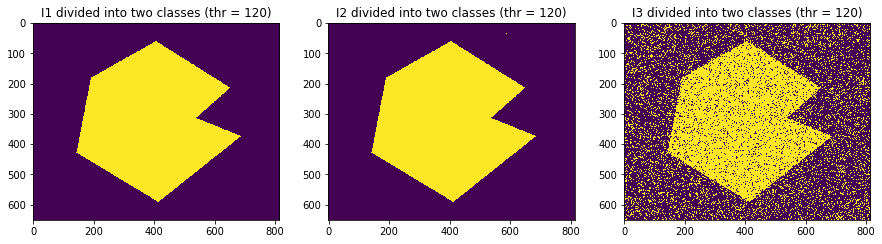

In [47]:
#Place threshold at value 120 in each of the images. 

lim1 = np.where(I1>120,1,0)
lim2 = np.where(I2>120,1,0)
lim3 = np.where(I3>120,1,0)

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(lim1)
ax1.set_title('I1 divided into two classes (thr = 120)')
ax2.imshow(lim2)
ax2.set_title('I2 divided into two classes (thr = 120)')
ax3.imshow(lim3)
ax3.set_title('I3 divided into two classes (thr = 120)')


### Conclusion:  

### For I1, there are many values for threshold which result in a good segmentation  (70 < threshold < 170)

### For I2, 110 < threshold < 140

### For I3, there is no threshold which will result in a perfect segmentation, since the histogram peaks are mixed.

## Next filter I3 with 5x5 moving average filter

In [ ]:
from scipy import ndimage

w = np.ones([5,5])/25
print('w = ',w)


I3smoothed = ndimage.convolve(I3,w, mode='reflect')

plt.imshow(I3smoothed)
plt.title('I3 smoothed with 5x5 moving average filter')
plt.show()

hist3smooth = cv2.calcHist([I3smoothed],[0],None,[256],[0,256])

plt.plot(hist3smooth)
plt.title('histogram of I3 smoothed')

In [ ]:
lim3s = np.where(I3smoothed>120,1,0)

plt.imshow(lim3s)
plt.title('Threshold applied after smoothing with 5x5 moving average filter')
plt.show()


## Otsu method 

## Method enable an automatic calculation of 'optimum' threshold


from skimage import filters
val1 = filters.threshold_otsu(I1)
val2 = filters.threshold_otsu(I2)
val3 = filters.threshold_otsu(I3)

print(f'Otsu optimal threshold for I1 is {val1}')
print(f'Otsu optimal threshold for I2 is {val2}')
print(f'Otsu optimal threshold for I3 is {val3}')

Otsu1 = np.where(I1>val1,1,0)
Otsu2 = np.where(I2>val2,1,0)
Otsu3 = np.where(I3>val3,1,0)

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(Otsu1)
ax1.set_title(f'I1 divided into two classes (thr = {val1})')
ax2.imshow(Otsu2)
ax2.set_title(f'I2 divided into two classes (thr = {val2})')
ax3.imshow(Otsu3)
ax3.set_title(f'I3 divided into two classes (thr = {val3})')


### Notice for I3, Otsu found a threshold close to the value that we would guess from the image before noise addition.

# Connected components

### Following program taken from:
"An interdisciplinary Introduction to Image Processing", Tanimoto, S.L., MIT Press, 2012, p.380.

In [ ]:
''' connectedComponents.py
 Computes a map of the 4 − connectedComponents of an image . '''

INPUT_IMAGE = [\
[0 , 1 , 0 , 1] ,\
[0 , 0 , 0 , 1] ,\
[1 , 1 , 1 , 1] ,\
[0 , 1 , 0 , 0]]


def CC ( im ):
    result=clone( im )
    INIT_UNION_FIND ( result )
    for i in range( len(im)):
        for j in range( len ( im  [0])):
            if j >0:
                v1 = im [ i ][ j ] # get pixel
                v2 = im [ i ][ j - 1]
                if v1 == v2 :
                    c1 = FIND (i , j )
                    c2 = FIND (i ,j - 1)
                    if c1 != c2 :
                        UNION( c1 , c2 )
            if i >0:
                v1 = im [ i ][ j ]
                v2 = im [ i - 1][ j ]
                if v1 == v2 :
                    c1 = FIND (i , j )
                    c2 = FIND (i - 1, j )
                    if c1 != c2 :
                        UNION( c1 , c2 )
    return RENDER()

def clone(image):

# R e t u r n s a copy of the list of list : image .
    return [ row [:] for row in image]

UPTREE_ARRAY = None


In [ ]:
def INIT_UNION_FIND(im):
    global UPTREE_ARRAY
    UPTREE_ARRAY = clone(im)
    for i in range(len(im)):
        for j in range(len(im[0])):
            # Make each entry a root :
            UPTREE_ARRAY[ i ][ j ] = ( i , j )

    # print_image ( UPTREE_ARRAY, useSeparator = True )

def print_image(im, useSeparator=False):
    if useSeparator: print("-----")
    for row in im:
        print (str(row))
        

def FIND (i , j ):
    global UPTREE_ARRAY

    ( ii , jj ) = UPTREE_ARRAY[ i ][ j ]
    if ii == i and jj == j : # At root ?
        return (ii, jj) # We ' ve found the root .
    else: return FIND(ii,jj) # Recursive search from parent

def UNION(c1,c2):
    (i,j) = c2
    global UPTREE_ARRAY
    UPTREE_ARRAY[i][j] = c1
    
def RENDER():
    global UPTREE_ARRAY
    n = 0 # components found so far : 0
    # print_image ( UPTREE_ARRAY, useSeparator = True )
    out = clone (UPTREE_ARRAY)
    dic = {} # MAPPING FROM ROOTS TO CC NUMBERS
    for i in range(len(out)):
        for j in range(len(out[0])):
            (ii, jj) = FIND(i,j)
            if i==ii and j==jj: #at a root?
                n +=1 #Yes, new component
                dic[(i,j)]=n # Register n with the coords
    # The dictionary is now complete .
    #  Use it to assign each pixel its cc number .
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[i][j] = dic[FIND(i,j)]
    return out

print_image(CC(INPUT_IMAGE))
